<a href="https://colab.research.google.com/github/gnani321/basic-ds-/blob/main/Logisitc_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('Titanic_train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

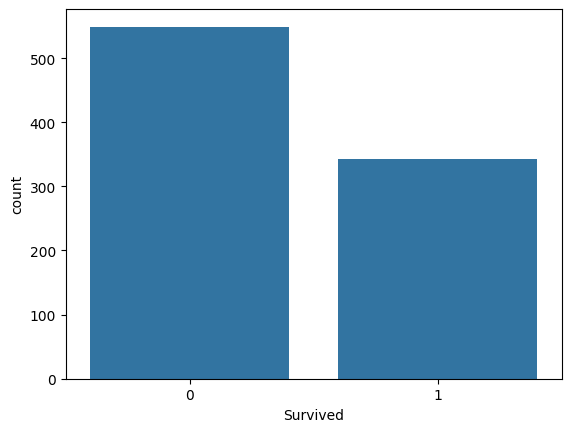

In [ ]:
#countplot of Survived
import seaborn as sns
sns.countplot(x='Survived',data=data)

<Axes: xlabel='Sex', ylabel='count'>

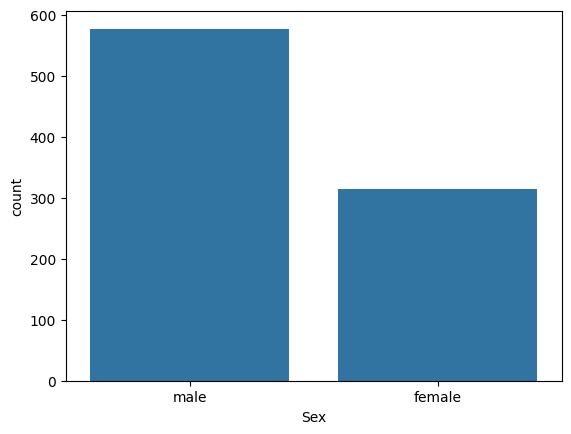

In [ ]:
sns.countplot(x='Sex',data=data)

In [ ]:
#  Survived / Sex
pd.crosstab(data['Survived'],data['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


<Axes: xlabel='Survived', ylabel='count'>

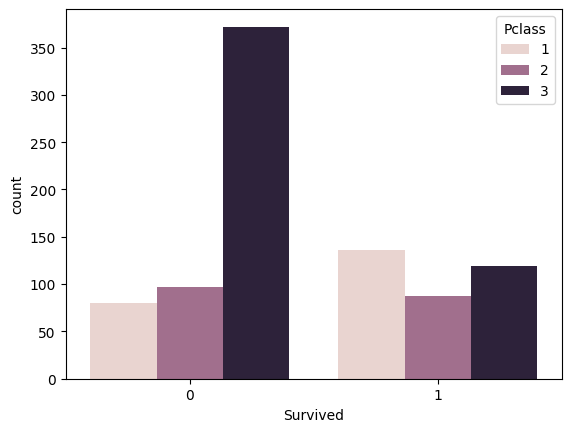

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=data)
# 1st class survival rate is more compared to other

<Axes: xlabel='SibSp', ylabel='count'>

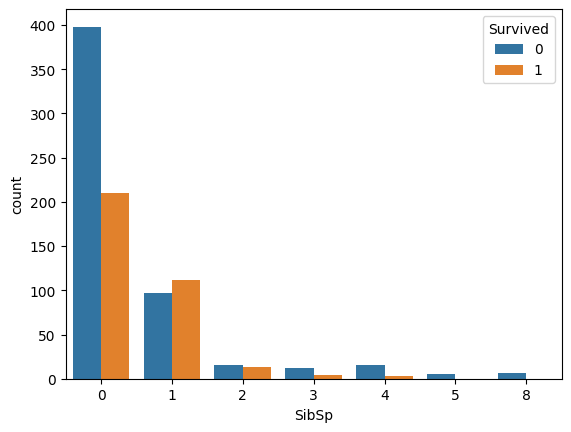

In [ ]:

# Analyze SibSp vs Survived
sns.countplot(x='SibSp',hue='Survived',data=data)
# Passengers with 1 or 2 siblings/spouse have slightly better survival rate

In [ ]:
# Survived / SibSp
pd.crosstab(data['Survived'],data['SibSp'])

# Survival rate is negatively correlated to SibSp (But weak)

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [ ]:
# survived / Parch
pd.crosstab(data['Survived'],data['Parch'])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [ ]:
# Survived / Embarked
pd.crosstab(data['Survived'],data['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


<Axes: xlabel='Survived', ylabel='Fare'>

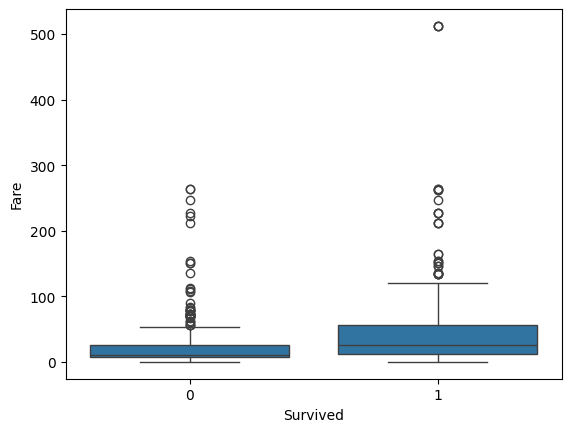

In [ ]:
# Survived / Fare better plot to visualise
sns.boxplot(x='Survived',y='Fare',data=data)

# Data Preprocessing:

In [ ]:
data.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
#handling missing values
data["Age"].fillna(data['Age'].mean(),inplace=True)
data["Embarked"].fillna(data['Embarked'].mode()[0],inplace=True)


<ipython-input-22-f0d8ecef2575>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data['Age'].mean(),inplace=True)
<ipython-input-22-f0d8ecef2575>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
data.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
numerical_columns=data.select_dtypes(include=np.number).columns
categorical_columns=data.select_dtypes(exclude=np.number).columns

In [ ]:
numerical_columns
categorical_columns

Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
numerical_columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
#Encode categorical variables.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])
data['Embarked'].head()

,Embarked
0,2
1,0
2,2
3,2
4,2


In [ ]:
data['Sex'].head()

,Sex
0,1
1,0
2,0
3,0
4,1


# Model Building:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
data.shape

(891, 8)

In [ ]:
#assiging x and y variables
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [ ]:
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [ ]:
#coeficents of features
classifier.coef_

array([[-1.04889679e+00, -2.63138591e+00, -3.84947312e-02,
        -3.17599571e-01, -9.02002213e-02,  2.13981143e-03,
        -2.19340631e-01]])

In [ ]:
#probability values
classifier.predict_proba(x)

array([[0.90607946, 0.09392054],
       [0.08148896, 0.91851104],
       [0.37056982, 0.62943018],
       ...,
       [0.51934108, 0.48065892],
       [0.38175676, 0.61824324],
       [0.89221947, 0.10778053]])

In [ ]:
y_pred=classifier.predict(x)
data['y_pred']=y_pred
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,y_pred
0,0,3,1,22.000000,1,0,7.2500,2,0
1,1,1,0,38.000000,1,0,71.2833,0,1
2,1,3,0,26.000000,0,0,7.9250,2,1
3,1,1,0,35.000000,1,0,53.1000,2,1
4,0,3,1,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,0
887,1,1,0,19.000000,0,0,30.0000,2,1
888,0,3,0,29.699118,1,2,23.4500,2,0
889,1,1,1,26.000000,0,0,30.0000,0,1


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
confusion_matrix

array([[473,  76],
       [102, 240]])

In [ ]:
pd.crosstab(y,y_pred)

col_0,0,1
Survived,,
0,473,76
1,102,240


In [ ]:
# accuracy
accuracy=sum(y==y_pred)/data.shape[0]
accuracy

0.8002244668911336

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [ ]:
#roc curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_pred)


0.7816604352411083

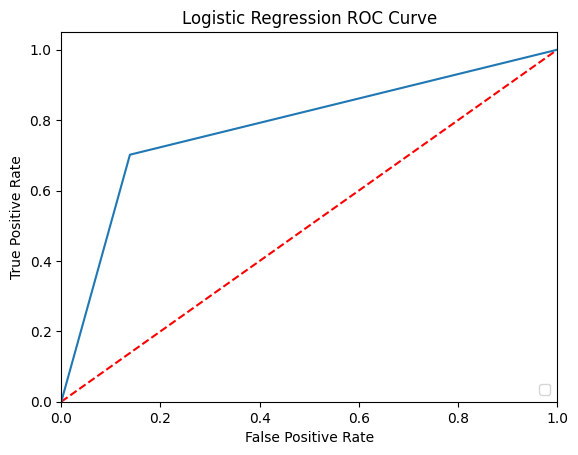

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr,tpr,threshols=roc_curve(y,y_pred)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.plot(fpr,tpr)
plt.legend(loc='lower right')
plt.show()

# Model Evaluation:

In [ ]:
#loading test data
test_data=pd.read_csv('Titanic_test.csv')

In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

In [ ]:
test_data.isna().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [ ]:
test_data.isna().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
test_data['Sex'] = le.fit_transform(test_data['Sex'])
test_data['Embarked'] = le.fit_transform(test_data['Embarked'])
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [ ]:
#predicting survive rates
y_pred_test=classifier.predict(test_data)
test_data['y_pred']=y_pred_test
test_data


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,y_pred
0,3,1,34.50000,0,0,7.8292,1,0
1,3,0,47.00000,1,0,7.0000,2,0
2,2,1,62.00000,0,0,9.6875,1,0
3,3,1,27.00000,0,0,8.6625,2,0
4,3,0,22.00000,1,1,12.2875,2,1
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2,0
414,1,0,39.00000,0,0,108.9000,0,1
415,3,1,38.50000,0,0,7.2500,2,0
416,3,1,30.27259,0,0,8.0500,2,0


In [ ]:
import statsmodels.api as sm
X = sm.add_constant(x)
model = sm.Logit(y,x).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.495760
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Mon, 23 Dec 2024   Pseudo R-squ.:                  0.2555
Time:                        07:02:20   Log-Likelihood:                -441.72
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.678e-62
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0479      0.079      0.603      0.546      -0.108       0.203
Sex           -2.2763      0.179    -12.702      0.000      -2.628      -1.925
Age            0.0045      0.006      0.784      0.433      -0.007       0.016
SibSp         -0.2951      0.095     -3.109      0.002      -0.481      -0.109
Parch         -0.1170      0.112     -1.048      0.294      -0.336       0.102
Fare           0.0184      0.003      6.072      0.000       0.012       0.024
Embarked       0.1219      0.105      1.156      0.248      -0.085       0.328
==============================================================================
"""



*   Survived is highly dependent on Pclass & Sex compared to remaining features.
*   Parch, Fare & Embarked are least significant features.

# INTERVIEW QUESTIONS

*   **Precision** is conditional probability of correctly predicted positives given all predicted positives where as **Recall** is conditional probability of correctly predicted positives of all actual positives
*   Cross validation is partitioning the available data into train & test data. It increases model performance, avoid memorizing (i.e., overfitting), Handling limited data, Model selection (applying different model on different subsets and choosing the best output - Ensembling Techniques)
